In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform

## MC přenos chyb

Máme $x = 0.1 \pm 0.1$, jaká je chyba $y = \sqrt[3]{x}$? Předpokládejme normální rozdělení $x$. Vypočtěte 95% interval spolehlivostni ($\pm 2\sigma$ pro normální rozdělení).

In [4]:
x_mean = 0.1
x_std = 0.1
def f(x): return np.cbrt(x)

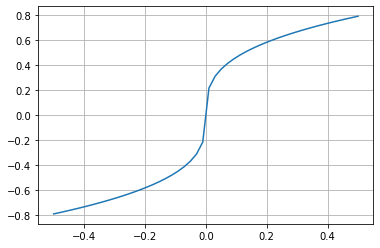

In [5]:
x = np.linspace(-.5, .5)
plt.plot(x, f(x))
plt.grid()

In [6]:
from numpy.random import normal

In [7]:
nsampl = 10000
xsampl = normal(x_mean, x_std, nsampl)
ysampl = f(xsampl)

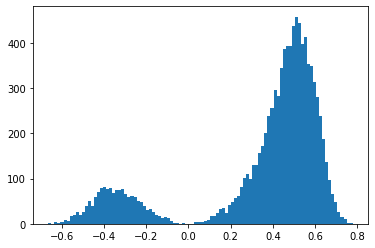

In [8]:
plt.hist(ysampl, bins=100);

In [12]:
Q0, Q1, Q2 = np.quantile(ysampl,[0.025, 0.5, 0.975])
print("y = %.2f, CI = (%.2f, %.2f)"%(Q1, Q0, Q2))

y = 0.46, CI = (-0.45, 0.67)


Porovnejme s analytickým výpočtem

In [10]:
def dfdx(x): return x**(-2/3)*1/3
# y_std = dfdx(x_mean) * x_std
y_std = dfdx(x_mean) * x_std
y_mean = f(x_mean)

In [13]:
G0, G1, G2 = y_mean - 2*y_std,y_mean, y_mean + 2*y_std
print("y = %.2f, CI = (%.2f, %.2f)"%(G1, G0, G2))

y = 0.46, CI = (0.15, 0.77)


In [38]:
y_mean - 2*y_std, y_mean + 2*y_std

(0.15471962778709264, 0.7735981389354631)

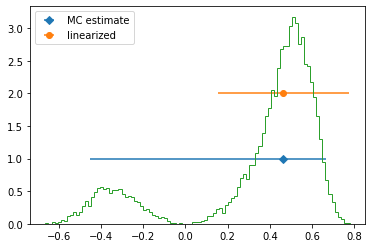

In [17]:
plt.errorbar([Q1], 1, xerr=np.array([[Q1-Q0], [Q2-Q1]]), fmt="D", label="MC estimate")
plt.errorbar([G1], 2, xerr=np.array([[G1-G0], [G2-G1]]), fmt="o", label="linearized")
plt.hist(ysampl, bins=100, density=True, histtype="step");
plt.legend(loc="upper left")

## Modelování srážkových procesů
- generuje náhodnou proměnnou z exponenciálního rozdělení

In [18]:
mfp = 10.
a = 1.

def fp_sample(mfp, size=None):
    g = uniform(size=size)
    return -mfp*np.log(g)

In [22]:
from numpy.random import exponential

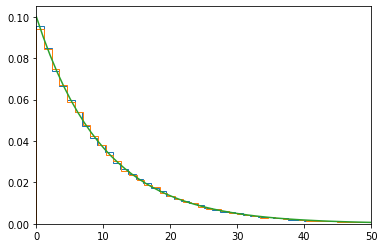

In [28]:
plt.hist(exponential(mfp, 100000), bins=100, density=True, histtype="step");
plt.hist(fp_sample(mfp, 100000), bins=100, density=True, histtype="step");
x = np.linspace(0, mfp*5)
plt.xlim(0, mfp*5)
plt.plot(x, 1/mfp*np.exp(-x/mfp))

Modelujte pohyb iontů Ar$^+$ v konst. elektrickém poli. Uvažujte, že ionty se pohybují v neutrálním plynu o zanedbatelné teplotě. Při srážkách dochází k rezonančnímu přenosu náboje. Částice startují v klidu, vypočtěte ryclostní rozdělení v čase $10\tau$

In [29]:
from scipy.constants import e, physical_constants
amu = physical_constants["atomic mass constant"][0]

Qi = e # C naboj iontu
# https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses
Mi = 39.962*amu # kg hmotnost iontu

In [31]:
E = 10000 # V/m vnejsi pole
ng = 1e17*1e6 # m-3 koncentrace neutralu
sigmav = 1e-9*1e-6 # m3 s-1 (sigma ~ 1/v)

nu = ng*sigmav # s-1 srazkova frekvence
tau = 1/nu

In [32]:
tau

1e-08

In [ ]:
def propagate(tmax):
    a = Qi*E/M # cm

In [ ]:
# https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses
Mi = 39.962

In [ ]:
def random_maxwell_v_component(T, M, nsampl):
    return np.random.normal(0, np.sqrt(k*T/M), nsampl)

In [24]:
from scipy.constants import e, physical_constants

In [25]:
amu = physical_constants["atomic mass constant"][0]

In [26]:
amu

(1.6605390666e-27, 'kg', 5e-37)